# Comparison between real points and theoretically points

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.style.use('default')

In [2]:
dev_btp = pd.read_csv('points_faisceaux/beam_dev_12_01_2022_BTP.csv', skiprows=1).fillna(0)
dev_pr = pd.read_csv('points_faisceaux/beam_dev_12_01_2022_PR.csv', skiprows=1).fillna(0)

In [3]:
def calc_absolute_deviation(my_dataframe):
    output_dataframe = pd.DataFrame(columns=["name","x", "y", "x_dev_absolute","y_dev_absolute"])
    
    for i in range(len(my_dataframe)):
        if (my_dataframe.X_S[i]-my_dataframe.X_E[i])>=0:
            sign = +1
        else:
            sign = -1
        
        if type(my_dataframe.NAME[i])==str: # Check if we have a name value
            
            # We differentiate between points that have an entrée and sortis points and those who don't
            if (  (my_dataframe.Y_S[i] != my_dataframe.Y_E[i]) & (my_dataframe.X_S[i] != my_dataframe.X_E[i]) & (my_dataframe.X_S[i] != my_dataframe.X_E[i]) ):
                #print(f"{my_dataframe.NAME[i]} has a length")
                angle = (my_dataframe.Y_S[i]-my_dataframe.Y_E[i]) / (my_dataframe.X_S[i] - my_dataframe.X_E[i])
                x_e_dev = my_dataframe.X_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.cos(angle)-sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.sin(angle)
                y_e_dev = my_dataframe.Y_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.sin(angle)+sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.cos(angle)

                x_s_dev = my_dataframe.X_S[i]+sign*my_dataframe.DEV_LONG_VALUE_S[i]*np.cos(angle)-sign*my_dataframe.DEV_RAD_VALUE_S[i]*np.sin(angle)
                y_s_dev = my_dataframe.Y_S[i]+sign*my_dataframe.DEV_LONG_VALUE_S[i]*np.sin(angle)+sign*my_dataframe.DEV_RAD_VALUE_S[i]*np.cos(angle)
                
                output_dataframe = output_dataframe.append({"name": str(my_dataframe.NAME[i])+".E" , "x": my_dataframe.X_E[i], "y": my_dataframe.Y_E[i], "x_dev_absolute": x_e_dev, "y_dev_absolute": y_e_dev}, ignore_index=True)
                output_dataframe = output_dataframe.append({"name": str(my_dataframe.NAME[i])+".S" , "x": my_dataframe.X_S[i], "y": my_dataframe.Y_S[i], "x_dev_absolute": x_s_dev, "y_dev_absolute": y_s_dev}, ignore_index=True)
            else:
                #print(f"{my_dataframe.NAME[i]} doesn't have a length")
                # The angle will be calculated with the point before for elements that do not have a length
                angle = (my_dataframe.Y_E[i]-my_dataframe.Y_S[i-1]) / (my_dataframe.X_E[i] - my_dataframe.X_S[i-1])
                x_dev = my_dataframe.X_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.cos(angle)-sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.sin(angle)
                y_dev = my_dataframe.Y_E[i]+sign*my_dataframe.DEV_LONG_VALUE_E[i]*np.sin(angle)+sign*my_dataframe.DEV_RAD_VALUE_E[i]*np.cos(angle)
                                
                # This time we do not put an .E or .S as the element doesn't have a length
                output_dataframe = output_dataframe.append({"name": str(my_dataframe.NAME[i]) , "x": my_dataframe.X_E[i], "y": my_dataframe.Y_E[i], "x_dev_absolute": x_dev, "y_dev_absolute": y_dev}, ignore_index=True)
       
        else:
            #print ("no name for element: "+str(i))
            pass
    return output_dataframe

In [4]:
df_btp = calc_absolute_deviation(dev_btp)
df_pr = calc_absolute_deviation(dev_pr)

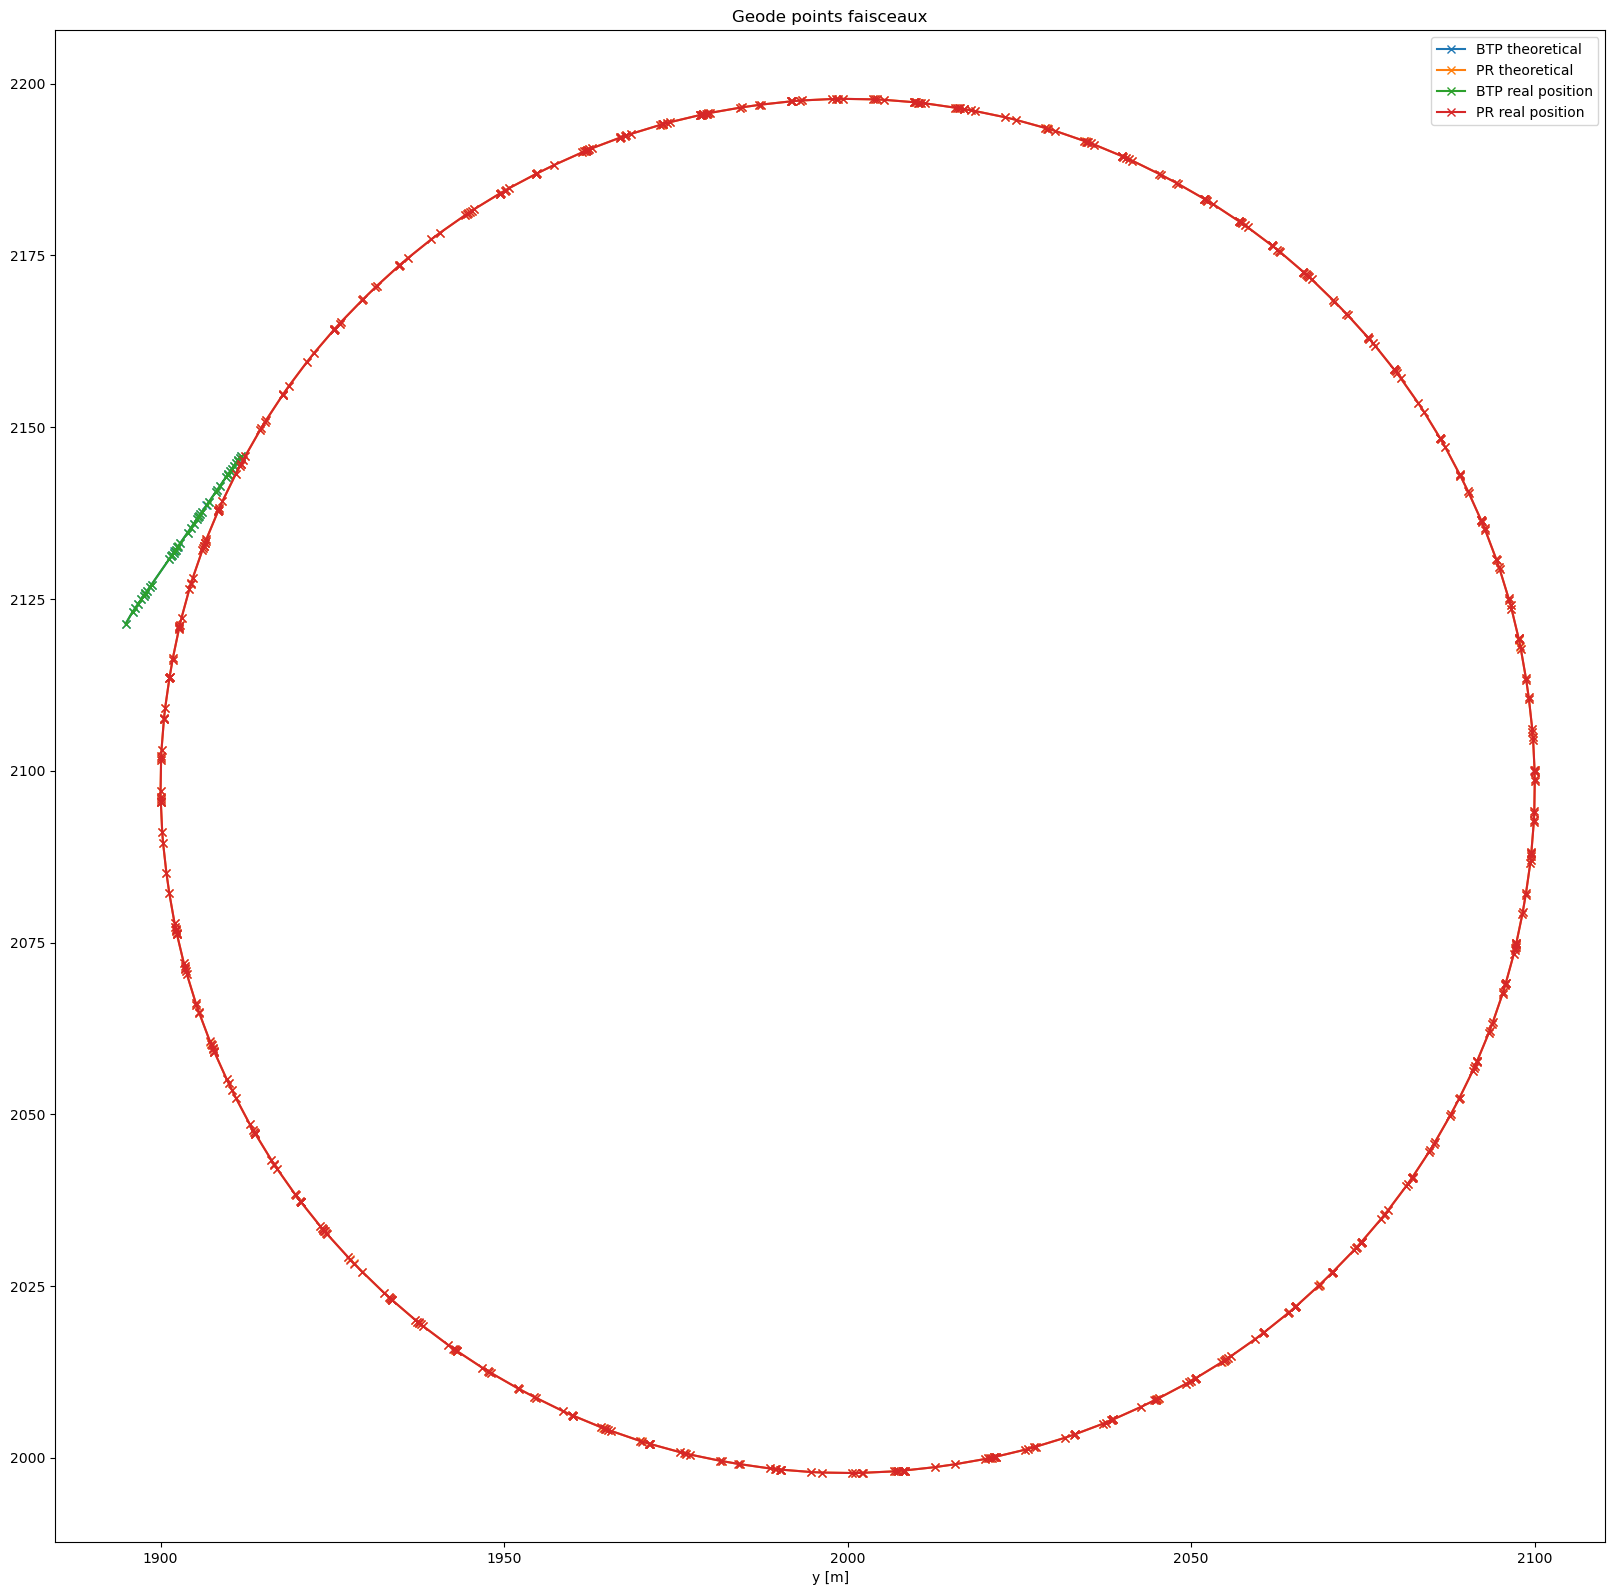

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Geode points faisceaux")

ax.plot(df_btp.x, df_btp.y, marker="x", label = "BTP theoretical")
ax.plot(df_pr.x, df_pr.y, marker="x", label = "PR theoretical")

ax.plot(df_btp.x_dev_absolute, df_btp.y_dev_absolute, marker="x", label = "BTP real position")
ax.plot(df_pr.x_dev_absolute, df_pr.y_dev_absolute, marker="x", label = "PR real position")
    
ax.set_aspect('equal')
plt.xlabel("x [m]")
plt.xlabel("y [m]")
plt.legend()

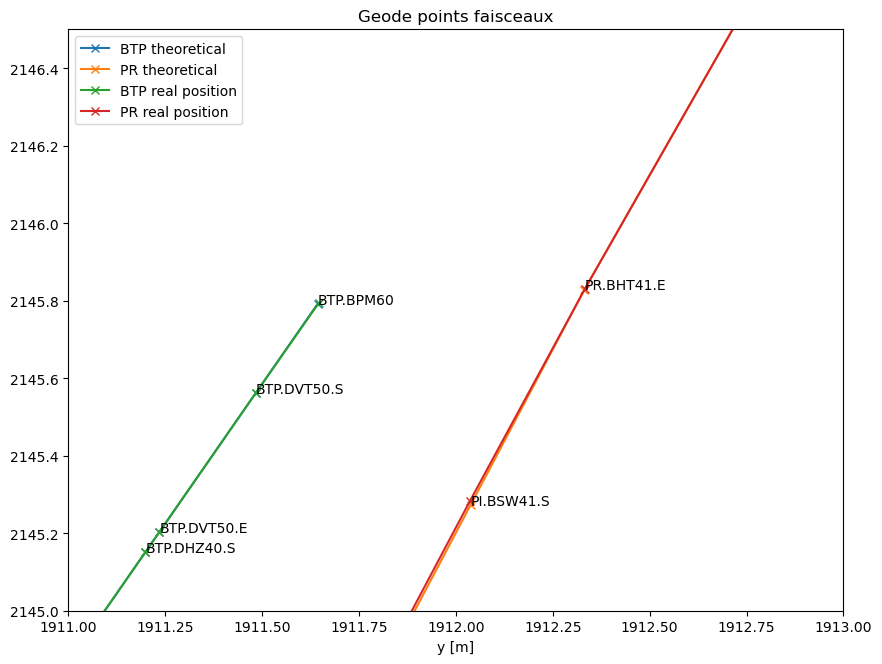

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Geode points faisceaux")

ax.plot(df_btp.x, df_btp.y, marker="x", label = "BTP theoretical")
ax.plot(df_pr.x, df_pr.y, marker="x", label = "PR theoretical")

ax.plot(df_btp.x_dev_absolute, df_btp.y_dev_absolute, marker="x", label = "BTP real position")
ax.plot(df_pr.x_dev_absolute, df_pr.y_dev_absolute, marker="x", label = "PR real position")

btp_range = [0,len(df_btp)]
pr_range = [0,len(df_pr)]

for i, txt in enumerate(df_btp.name[btp_range[0]:btp_range[1]]):
    ax.annotate(txt, (df_btp.x[btp_range[0]+i], df_btp.y[btp_range[0]+i]),rotation=0)
for i, txt in enumerate(df_pr.name[pr_range[0]:pr_range[1]]):
    ax.annotate(txt, (df_pr.x[pr_range[0]+i], df_pr.y[pr_range[0]+i]),rotation=0)

ax.set_aspect('equal')
ax.set_xlim(1911,1913)
ax.set_ylim(2145,2146.5)
plt.xlabel("x [m]")
plt.xlabel("y [m]")
plt.legend()
plt.savefig("fig/geode_btp_pr_real_points", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')